In [1]:
import numpy as np

In [24]:
class PCA():
    # 计算协方差矩阵
    def calc_cov(self, X):
        m = X.shape[0]
        # 数据标准化
        X = (X - np.mean(X, axis=0)) / np.var(X, axis=0)
        return 1 / m * np.matmul(X.T, X)
    
    # 根据累计方差贡献率选择特征
    def select_by_per(self, eigVals, percentage):
        eigVals_sort = sorted(eigVals, reverse=True)
        eigVals_sum = sum(eigVals)
        n = 0
        sum_per = 0
        for i in eigVals_sort:
            n += 1
            sum_per += i / eigVals_sum
            if sum_per >= percentage:
                return n

    def pca(self, X, n_components=None, percentage=None):
        # 计算协方差矩阵
        cov_matrix = self.calc_cov(X)
        # 计算协方差矩阵的特征值和对应特征向量
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        # 对特征值排序
        idx = eigenvalues.argsort()[::-1]
        # 取最大的前n_component组
        eigenvectors = eigenvectors[:, idx]
        if  percentage:
            print(eigenvalues)
            n_components = self.select_by_per(eigenvalues, percentage)
        print(n_components)
        eigenvectors = eigenvectors[:, :n_components]
        # Y=PX转换
        return np.matmul(X, eigenvectors)

In [ ]:
## 与 s

[5.86500015 2.71213057 0.23645267 0.00938952]
3


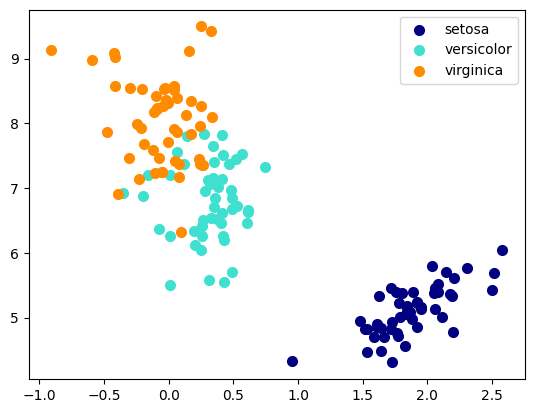

In [25]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 导入sklearn数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 将数据降维到3个主成分
X_trans = PCA().pca(X, percentage=0.99)
# 颜色列表
colors = ['navy', 'turquoise', 'darkorange']

# 绘制不同类别
for c, i, target_name in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1],
            color=c, lw=2, label=target_name)
# 添加图例
plt.legend()
plt.show();

In [ ]:
# 导入sklearn降维模块
from sklearn import decomposition
# 创建pca模型实例，主成分个数为3个
pca = decomposition.PCA(n_components=3)
# 模型拟合
pca.fit(X)
# 拟合模型并将模型应用于数据X
X_trans = pca.transform(X)

# 颜色列表
colors = ['navy', 'turquoise', 'darkorange']
# 绘制不同类别
for c, i, target_name in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1], 
            color=c, lw=2, label=target_name)
# 添加图例
plt.legend()
plt.show();

In [ ]:
def pca(data,n):
    data_std = standardization(data)
    covMat = np.cov(newData,rowvar=0)    #求协方差矩阵,return ndarray；若rowvar非0，一列代表一个样本，为0，一行代表一个样本
    
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))#求特征值和特征向量,特征向量是按列放的，即一列代表一个特征向量
    eigValIndice=np.argsort(eigVals)            #对特征值从小到大排序
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   #最大的n个特征值的下标
    n_eigVect=eigVects[:,n_eigValIndice]        #最大的n个特征值对应的特征向量
    lowDDataMat=newData*n_eigVect               #低维特征空间的数据
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #重构数据
    return lowDDataMat,reconMat